In [3]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [14]:
def main():
    sunday = pd.read_csv("bus_144_sunday_clustering.csv")
    weekday = pd.read_csv("bus_144_weekday_clustering.csv")
    saturday = pd.read_csv("bus_R5_saturday_clustering.csv")

    # Add a 'day_type' column to each DataFrame
    sunday['day_type'] = 'Sunday'
    weekday['day_type'] = 'Weekday'
    saturday['day_type'] = 'Saturday'

    # Combine the datasets
    combined_data = pd.concat([sunday, weekday, saturday], ignore_index=True)
    
    # Perform the normality test on 'time_diff'
    stat, p = stats.normaltest(combined_data['time_diff'])
    print('Normality test statistics:', stat, 'p-value:', p)

    # Perform Levene’s test for homogeneity of variances
    stat, p = stats.levene(
        sunday['time_diff'], 
        weekday['time_diff'], 
        saturday['time_diff']
    )
    print('Levene’s test statistics:', stat, 'p-value:', p)

    # Filter the combined data for the two groups
    sunday_time_diff = combined_data[combined_data['day_type'] == 'Sunday']['time_diff']
    weekday_time_diff = combined_data[combined_data['day_type'] == 'Weekday']['time_diff']
    saturday_time_diff = combined_data[combined_data['day_type'] == 'Saturday']['time_diff']
    
    # Perform the Mann-Whitney U test between Sunday and Weekday
    u_statistic_1, p_value_1 = mannwhitneyu(sunday_time_diff, weekday_time_diff, alternative='two-sided')
    
    # Perform the Mann-Whitney U test between Saturday and Weekday
    u_statistic_2, p_value_2 = mannwhitneyu(saturday_time_diff, weekday_time_diff, alternative='two-sided')
    
    # Perform the Mann-Whitney U test between Sunday and Saturday
    u_statistic_3, p_value_3 = mannwhitneyu(sunday_time_diff, saturday_time_diff, alternative='two-sided')

    print('Mann-Whitney U test statistic comparing Weekday and Sunday:', u_statistic_1, 'p-value:', p_value_1)
    print('Mann-Whitney U test statistic comparing Weekday and Saturday:', u_statistic_2, 'p-value:', p_value_2)
    print('Mann-Whitney U test statistic comparing Sunday and Saturday:', u_statistic_3, 'p-value:', p_value_3)
    
    # Replace 'sunday' with 'weekday' or 'saturday' as needed
    time_diff_data = combined_data['time_diff']

    # Set the style
    sns.set(style="whitegrid")

    # Plot a histogram of the time differences
    plt.figure(figsize=(10, 6))
    sns.histplot(time_diff_data, bins=30, kde=True) # KDE (Kernel Density Estimate) adds a density line

    # Labeling the plot
    plt.title('Histogram of Time Differences for Bus 145 across days')
    plt.xlabel('Time Difference (minutes)')
    plt.ylabel('Frequency')

    # Display the plot
    plt.show()

Normality test statistics: 200.8763554214661 p-value: 2.4002343562040794e-44
Levene’s test statistics: 3.0074700823470804 p-value: 0.05090393366396666
Mann-Whitney U test statistic comparing Weekday and Sunday: 9036.5 p-value: 5.056161091738376e-16
Mann-Whitney U test statistic comparing Weekday and Saturday: 9017.5 p-value: 2.4234890736213533e-12
Mann-Whitney U test statistic comparing Sunday and Saturday: 4616.5 p-value: 0.013310671701741984


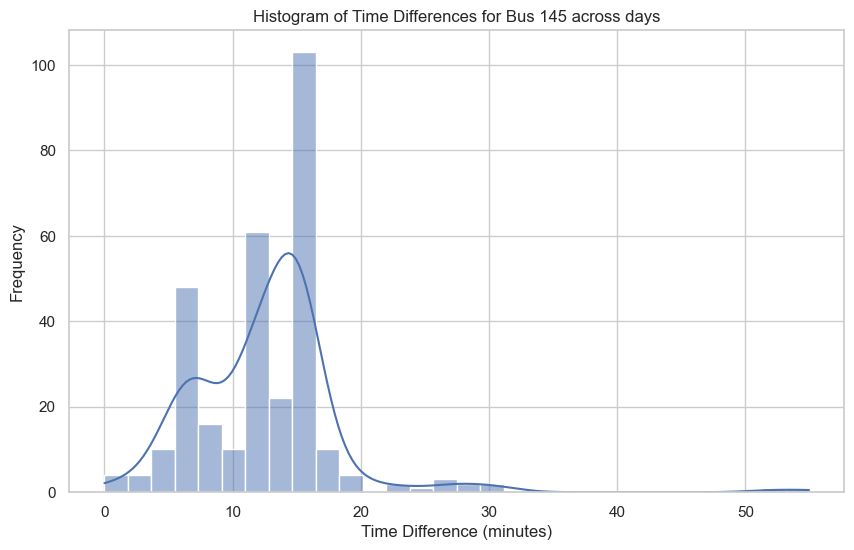

In [15]:
main()